In [24]:
# playground for non-causal non-negative FIR filtering

import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.ndimage import gaussian_filter1d


<StemContainer object of 3 artists>

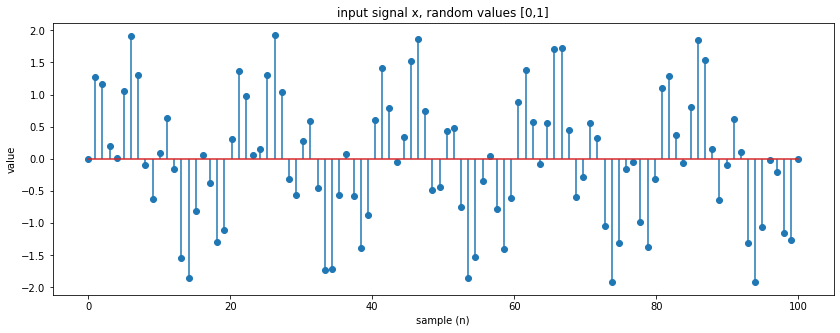

In [25]:
# random numbers as input
T = 100       # length of pos time
N = 2**8
C = 78        # index t = 0
D = 178       # index at t = T
n = np.linspace(0,100,100)
n_pad = np.linspace(0,N,N)
ran = np.zeros(N)
ran[C:D] = random.rand(T)
fs = 1
Ts = 1/fs
wa = 0.1*np.pi
wb = 0.4*np.pi

sinx = np.zeros(N)
sinx[C:D] = np.sin(wa*Ts*n) + np.sin(wb*Ts*n)

x = sinx

fig= plt.figure(figsize=(14,5))
plt.title('input signal x, random values [0,1]')
plt.xlabel('sample (n)')
plt.ylabel('value')
plt.stem(n,x[C:D])

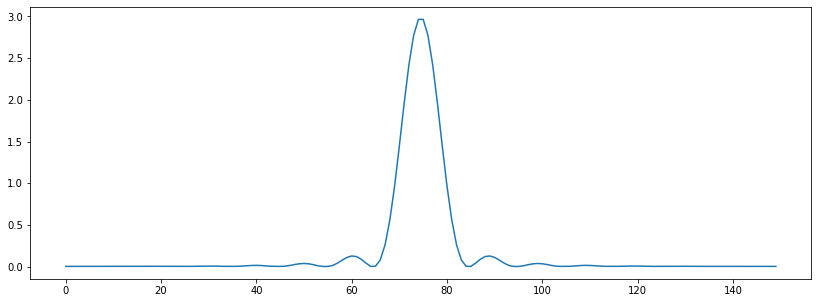

In [26]:
# define FIR
wc1 = 0.2
L = 150
h = signal.firwin(L,cutoff=wc1,window='hamming',pass_zero='lowpass')
H = scipy.fft.fft(h)
H = np.convolve(H,H,'same')
h = np.abs(scipy.fft.ifft(H))
h0 = h * 1/sum(h)

fig= plt.figure(figsize=(14,5))
plt.plot(range(L),h)

Text(0.5, 1.0, 'group delay')

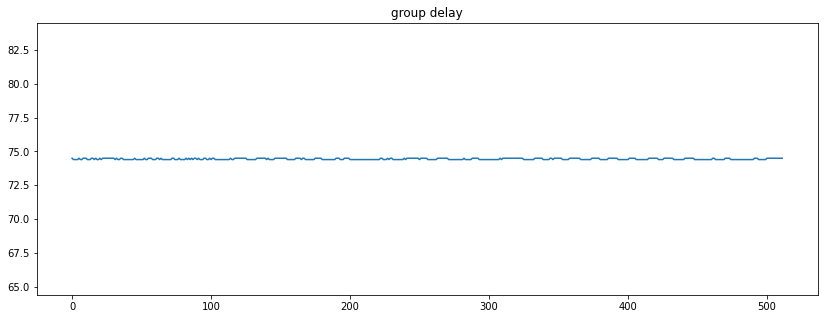

In [31]:
b0 = h0
a = 1

# need to truncate decimals because weird output:
def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

w, gd = signal.group_delay((b0, a))

# truncate b0
for i in range(len(gd)):
    gd[i] = truncate(gd[i],decimals=1)

fig= plt.figure(figsize=(14,5))
plt.plot(gd)
plt.ylim(np.amin(gd)-10,np.amax(gd)+10)
plt.title('group delay')

Text(0.5, 0, 'w (0 to pi)')

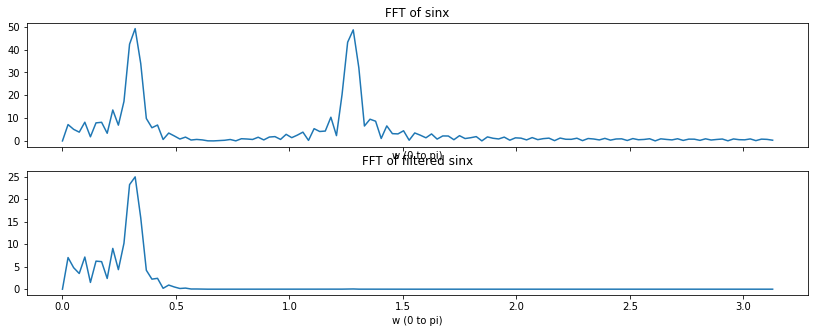

In [32]:
# convolve impulse and plot ffts
y1 = np.convolve(x,h0,'same')

f = np.linspace(0, 2*np.pi, N)

# fft original
Y0 = scipy.fft.fft(x)
Y0_mag = np.absolute(Y0)

# fft filtered
Y1 = scipy.fft.fft(y1)
Y1_mag = np.absolute(Y1)

# plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,5), sharex=True)

Y0_db = 20*np.log10(Y0_mag[:N//2])
Y1_db = 20*np.log10(Y1_mag[:N//2])

ax1.plot(f[:N//2],Y0_mag[:N//2])
ax1.set_title('FFT of sinx')
ax1.set_xlabel('w (0 to pi)')
#ax1.set_ylabel('magnitude (dB)')

ax2.plot(f[:N//2],Y1_mag[:N//2])
ax2.set_title('FFT of filtered sinx')
ax2.set_xlabel('w (0 to pi)')
#ax2.set_ylabel('magnitude (dB)')


In [33]:
# plot freq attributes of h0

z,p,k = scipy.signal.tf2zpk(b0,a)

#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,5), sharex=True)



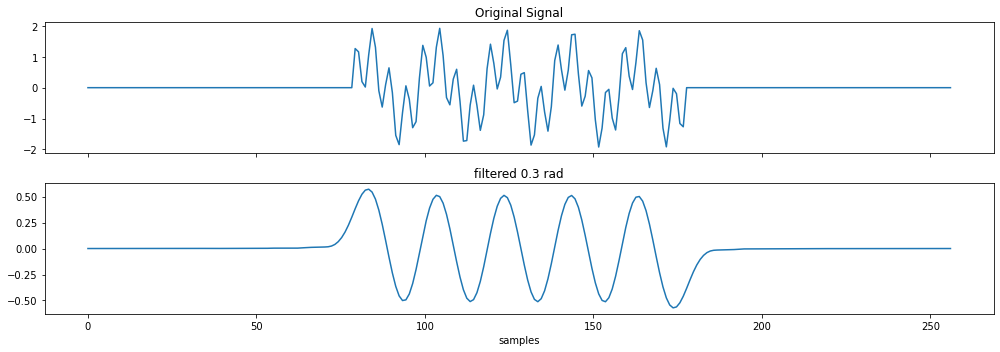

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,5), sharex=True)

ax1.plot(n_pad, x)
ax1.set_title('Original Signal')

ax2.plot(n_pad, y1)
ax2.set_title('filtered 0.3 rad')
ax2.set_xlabel('samples')
plt.tight_layout()
plt.show()